In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import StringIO
import numpy as np

In [ ]:
goes_df = pd.read_csv('/content/weather.csv', parse_dates=['time'], index_col='time')
goes_df['time'] = goes_df.index
goes_df['Hour'] = goes_df['time'].dt.floor('h')

In [ ]:
sdo_df = pd.read_csv('/content/bz_area_all_files.csv')
sdo_df['Timestamp'] = pd.to_datetime(sdo_df['Timestamp'])
sdo_df['Hour'] = sdo_df['Timestamp'].dt.floor('h')

In [ ]:
sdo_df

,Bz_Gauss,Pixel_Area_cm2,Timestamp,File_Index,Hour
0,-5.5,2.892493e+10,2023-01-01 00:00:22.100,0,2023-01-01 00:00:00
1,11.0,2.892493e+10,2023-01-01 00:00:22.100,0,2023-01-01 00:00:00
2,-13.5,2.892493e+10,2023-01-01 00:00:22.100,0,2023-01-01 00:00:00
3,-25.0,2.892493e+10,2023-01-01 00:00:22.100,0,2023-01-01 00:00:00
4,5.0,2.892493e+10,2023-01-01 00:00:22.100,0,2023-01-01 00:00:00
...,...,...,...,...,...
959795,-4.7,2.892493e+10,2023-01-01 23:00:22.100,23,2023-01-01 23:00:00
959796,4.8,2.892493e+10,2023-01-01 23:00:22.100,23,2023-01-01 23:00:00
959797,-5.5,2.892493e+10,2023-01-01 23:00:22.100,23,2023-01-01 23:00:00
959798,3.9,2.892493e+10,2023-01-01 23:00:22.100,23,2023-01-01 23:00:00


In [ ]:
sdo_df['Timestamp'] = pd.to_datetime(sdo_df['Timestamp'])

sdo_df['Pixel_Unsigned_Flux'] = np.abs(sdo_df['Bz_Gauss']) * sdo_df['Pixel_Area_cm2']

sdo_df = sdo_df.groupby('Hour').agg({
    'Pixel_Unsigned_Flux': 'sum'
}).reset_index()


In [ ]:
sdo_df

,Hour,Pixel_Unsigned_Flux
0,2023-01-01 00:00:00,1.200350e+16
1,2023-01-01 01:00:00,1.191060e+16
2,2023-01-01 02:00:00,1.187232e+16
3,2023-01-01 03:00:00,1.158464e+16
4,2023-01-01 04:00:00,1.126329e+16
5,2023-01-01 05:00:00,1.143453e+16
6,2023-01-01 06:00:00,1.197106e+16
7,2023-01-01 07:00:00,1.130741e+16
8,2023-01-01 08:00:00,1.082665e+16
9,2023-01-01 09:00:00,1.090746e+16


In [ ]:
# Group by hour and sum the unsigned magnetic flux
goes_df = goes_df.groupby('Hour').agg({
    'xrsa': 'mean'
}).reset_index()


goes_df = goes_df.head(24)

In [ ]:
goes_df

,Hour,xrsa
0,2023-01-01 00:00:00,7.583284e-08
1,2023-01-01 01:00:00,7.940654e-08
2,2023-01-01 02:00:00,1.620805e-07
3,2023-01-01 03:00:00,7.823757e-08
4,2023-01-01 04:00:00,6.362206e-08
5,2023-01-01 05:00:00,8.202930e-08
6,2023-01-01 06:00:00,6.756458e-08
7,2023-01-01 07:00:00,6.959780e-08
8,2023-01-01 08:00:00,5.605376e-08
9,2023-01-01 09:00:00,5.249626e-08


In [ ]:
merged_df = pd.merge(goes_df, sdo_df, on='Hour', how='outer', suffixes=('_sdo', '_goes'))

In [ ]:
merged_df

,Hour,xrsa,Total_Unsigned_Magnetic_Flux,File_Index
0,2023-01-01 00:00:00,7.583284e-08,1.200350e+16,0
1,2023-01-01 01:00:00,7.940654e-08,1.191060e+16,1
2,2023-01-01 02:00:00,1.620805e-07,1.187232e+16,2
3,2023-01-01 03:00:00,7.823757e-08,1.158464e+16,3
4,2023-01-01 04:00:00,6.362206e-08,1.126329e+16,4
5,2023-01-01 05:00:00,8.202930e-08,1.143453e+16,5
6,2023-01-01 06:00:00,6.756458e-08,1.197106e+16,6
7,2023-01-01 07:00:00,6.959780e-08,1.130741e+16,7
8,2023-01-01 08:00:00,5.605376e-08,1.082665e+16,8
9,2023-01-01 09:00:00,5.249626e-08,1.090746e+16,9


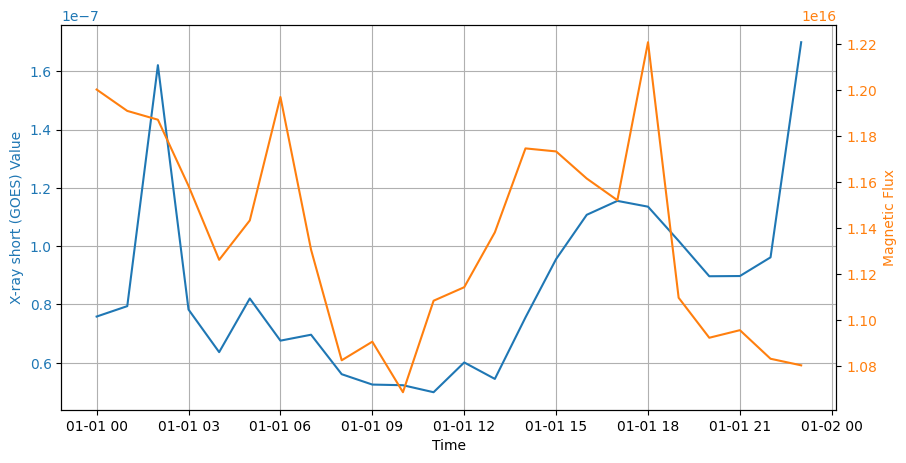

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot X-ray short (GOES) on the primary y-axis (ax1)
color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('X-ray short (GOES) Value', color=color)
ax1.plot(merged_df['Hour'], merged_df['xrsa'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Magnetic Flux', color=color)
ax2.plot(merged_df['Hour'], merged_df['Total_Unsigned_Magnetic_Flux'], color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.show()